In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mall_customer_info= pd.read_csv("/workspaces/codespaces-jupyter/data/Mall_Customers.csv")
mall_customer_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
mall_customer_info.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [13]:
mall_customer_info.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
120,121,Male,27,67,56
12,13,Female,58,20,15
140,141,Female,57,75,5
59,60,Male,53,46,46
177,178,Male,27,88,69
113,114,Male,19,64,46
73,74,Female,60,50,56
90,91,Female,68,59,55
16,17,Female,35,21,35
151,152,Male,39,78,88


In [14]:
mall_customer_info.reset_index(inplace=True,drop=True)

In [29]:
mall_customer_info.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [44]:
mall_customer_info.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [35]:
mall_customer_info.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

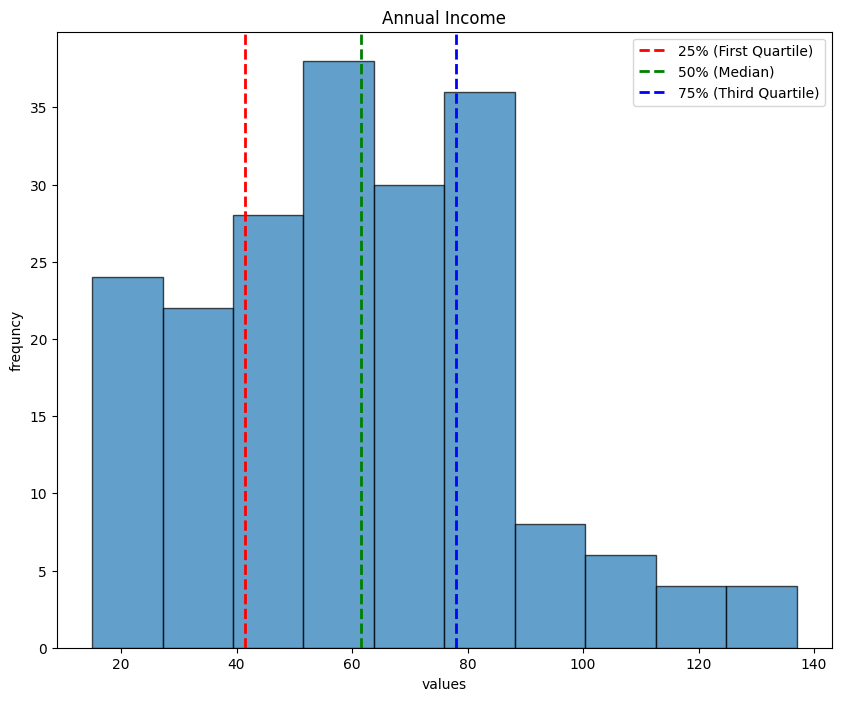

In [41]:
description = mall_customer_info.describe()
percentiles = description.loc[['25%', '50%', '75%'], 'Annual Income (k$)']

plt.figure(figsize=(10,8))
plt.hist(mall_customer_info['Annual Income (k$)'],bins=10 , edgecolor='k',alpha=0.7)
plt.title("Annual Income")
plt.axvline(percentiles['25%'], color='r', linestyle='dashed', linewidth=2, label='25% (First Quartile)')
plt.axvline(percentiles['50%'], color='g', linestyle='dashed', linewidth=2, label='50% (Median)')
plt.axvline(percentiles['75%'], color='b', linestyle='dashed', linewidth=2, label='75% (Third Quartile)')
plt.xlabel('values')
plt.ylabel('frequncy')
plt.legend()
plt.show()

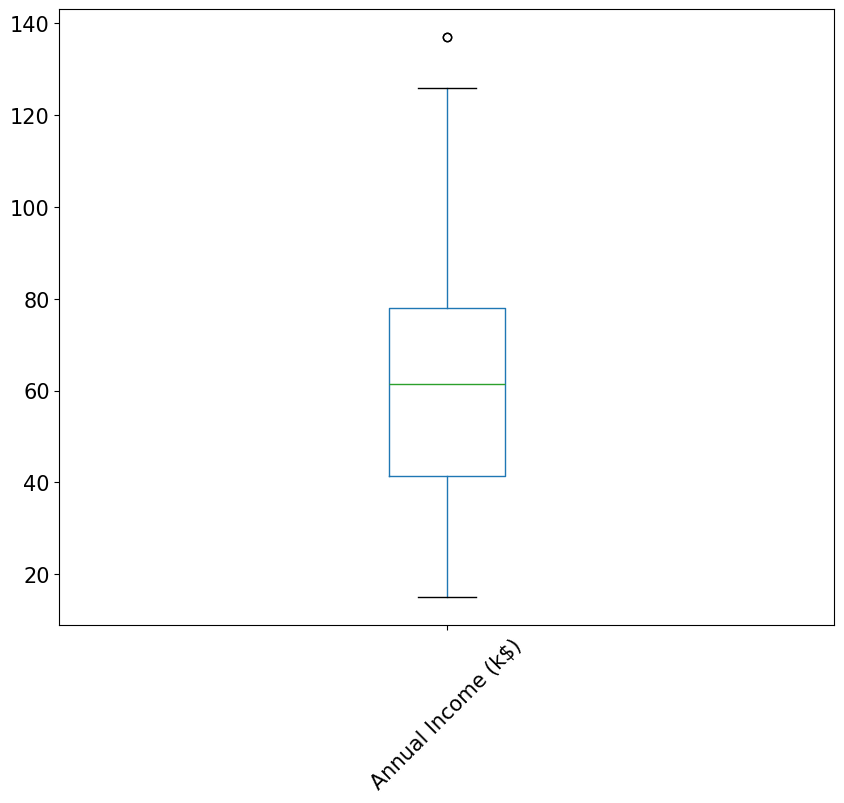

In [43]:
boxPlot = mall_customer_info.boxplot(grid=False,column=['Annual Income (k$)'],fontsize=15,rot=45,figsize=(10,8))

In [79]:
mall_customer_info.loc[mall_customer_info['Annual Income (k$)']>125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outliers,AAnnual Income (k$)
196,197,Female,45,126.0,28,False,NaN
197,198,Male,32,126.0,74,False,NaN


In [64]:
Q1 = mall_customer_info['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customer_info['Annual Income (k$)'].quantile(0.75)
Q1,Q3

(np.float64(41.5), np.float64(78.0))

In [65]:
IQR = Q3-Q1
min = Q1-1.5*IQR
max = Q3+1.5*IQR
min,max

(np.float64(-13.25), np.float64(132.75))

In [66]:
mall_customer_info['Annual_Income_Outliers']=False

In [67]:
for i,v in mall_customer_info.iterrows():
    if v['Annual Income (k$)']>max:
        mall_customer_info.at[i,'Annual_Income_Outliers']=True

In [68]:
mall_customer_info['Annual_Income_Outliers'].sum()

np.int64(2)

In [69]:
mean = mall_customer_info['Annual Income (k$)'].mean()
mean

np.float64(60.56)

In [70]:
for index,value in mall_customer_info.iterrows():
    if value['Annual_Income_Outliers'] == True:
        mall_customer_info.at[index,'Annual Income (k$)']=mean

/tmp/ipykernel_5520/4019327847.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '60.56' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mall_customer_info.at[index,'Annual Income (k$)']=mean


In [77]:
mall_customer_info.drop(columns=['AAnnual Income (k$)'],axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outliers
0,1,Male,19,15.00,39,False
1,2,Male,21,15.00,81,False
2,3,Female,20,16.00,6,False
3,4,Female,23,16.00,77,False
4,5,Female,31,17.00,40,False
...,...,...,...,...,...,...
195,196,Female,35,120.00,79,False
196,197,Female,45,126.00,28,False
197,198,Male,32,126.00,74,False
198,199,Male,32,60.56,18,True


In [78]:
mall_customer_info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),AAnnual Income (k$)
count,200.000000,200.000000,200.000000,200.000000,2.00
mean,100.500000,38.850000,59.795600,50.200000,60.56
std,57.879185,13.969007,25.110236,25.823522,0.00
min,1.000000,18.000000,15.000000,1.000000,60.56
25%,50.750000,28.750000,41.500000,34.750000,60.56
50%,100.500000,36.000000,60.780000,50.000000,60.56
75%,150.250000,49.000000,77.250000,73.000000,60.56
max,200.000000,70.000000,126.000000,99.000000,60.56


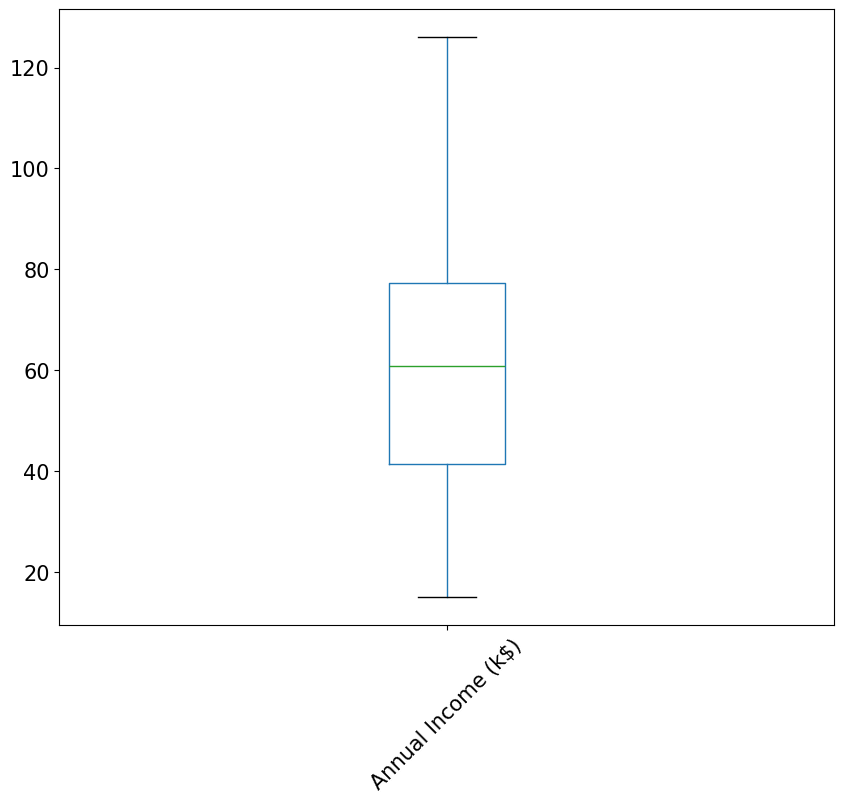

In [80]:
boxPlot = mall_customer_info.boxplot(grid=False,column=['Annual Income (k$)'],fontsize=15,rot=45,figsize=(10,8))